In [1]:
!pip install fastai --user

In [2]:
conda install -c fastai fastai

^C

Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import os
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *


In [2]:
import fastai
print('The version of FastAI being used is:',fastai.__version__)


The version of FastAI being used is: 2.7.13


In [3]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [4]:
from PIL import Image
mild_demented = Image.open(r'C:\Users\student.MCC\Desktop\mildDemented.jpg')
moderate_demented = Image.open(r'C:\Users\student.MCC\Desktop\moderateDem0.jpg')
non_demented = Image.open(r'C:\Users\student.MCC\Desktop\nonDem0.jpg')
very_mild = Image.open(r'C:\Users\student.MCC\Desktop\verymildDem0.jpg')
width_md, height_md = mild_demented.size
width_mod, height_mod = moderate_demented.size
width_non, height_non = non_demented.size
width_vmd, height_vmd = very_mild.size
print(f"Mild Demented - Image width: {width_md}, Image height: {height_md}")
print(f"Moderate Demented - Image width: {width_mod}, Image height: {height_mod}")
print(f"Non Demented - Image width: {width_non}, Image height: {height_non}")
print(f"Very Mild Demented - Image width: {width_vmd}, Image height: {height_vmd}")


Mild Demented - Image width: 176, Image height: 208
Moderate Demented - Image width: 176, Image height: 208
Non Demented - Image width: 176, Image height: 208
Very Mild Demented - Image width: 176, Image height: 208


In [5]:
from PIL import Image

mild_demented = Image.open(r'C:\Users\student.MCC\Desktop\mildDemented.jpg')
moderate_demented = Image.open(r'C:\Users\student.MCC\Desktop\moderateDem0.jpg')
non_demented = Image.open(r'C:\Users\student.MCC\Desktop\nonDem0.jpg')
very_mild = Image.open(r'C:\Users\student.MCC\Desktop\verymildDem0.jpg')

print("Image Format:", mild_demented.format)
print("Image Format:", moderate_demented.format)
print("Image Format:", non_demented.format)
print("Image Format:", very_mild.format)
print("Image Size:", mild_demented.size)
print("Image Size:", moderate_demented.size)
print("Image Size:", non_demented.size)
print("Image Size:", very_mild.size)


Image Format: JPEG
Image Format: JPEG
Image Format: JPEG
Image Format: JPEG
Image Size: (176, 208)
Image Size: (176, 208)
Image Size: (176, 208)
Image Size: (176, 208)


In [6]:
mild_demented.show()
moderate_demented.show()
non_demented.show()
very_mild.show()


In [7]:
mild_demented.close()
moderate_demented.close()
non_demented.close()
very_mild.close()



In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()


In [9]:
df = pd.read_csv(r'C:\Users\student.MCC\Downloads\oasis_longitudinal.csv')
df.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [10]:
import os
import pandas as pd

image_directory = r'C:\Users\student.MCC\Desktop\mildDemented.jpg'
image_directory1 = r'C:\Users\student.MCC\Desktop\moderateDem0.jpg'
image_directory2 = r'C:\Users\student.MCC\Desktop\nonDem0.jpg'
image_directory3 = r'C:\Users\student.MCC\Desktop\verymildDem0.jpg'


In [11]:
image_paths = []
labels = []


In [12]:
def get_label(directory):
    if 'MildDemented' in directory:
        return 0
    elif 'ModerateDemented' in directory:
        return 1
    elif 'NonDemented' in directory:
        return 0
    elif 'VeryMildDemented' in directory:
        return 1
    else:
        return -1 

In [13]:
df = df.loc[df['Visit']==1] # use first visit data only because of the analysis we're doing
df = df.reset_index(drop=True) # reset index after filtering first visit data
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F column
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Target variable
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Target variable
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1)


In [14]:
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))


Text(0.5, 1.0, 'Gender and Demented rate')

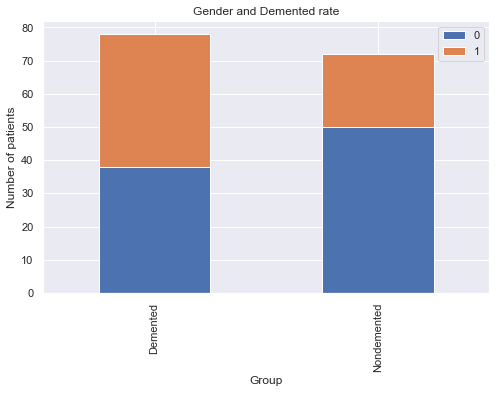

In [15]:
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')


(15.3, 30.0)

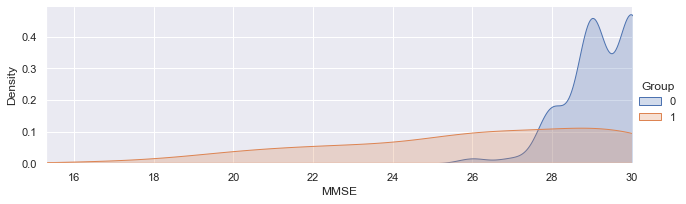

In [16]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',fill= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)


(0.5, 2.0)

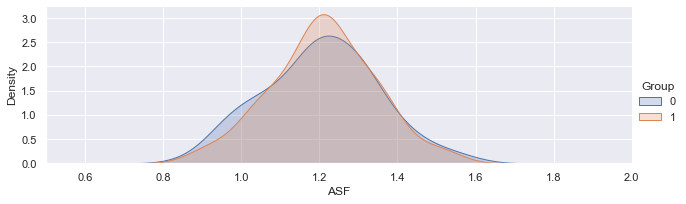

In [17]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',fill= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)


(900.0, 2100.0)

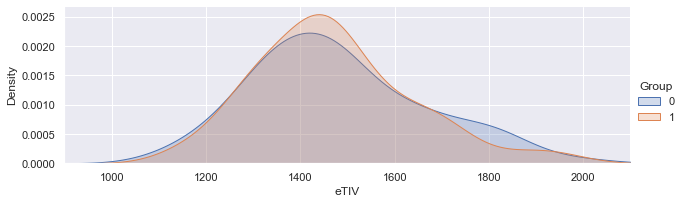

In [18]:

facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',fill= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)


(0.6, 0.9)

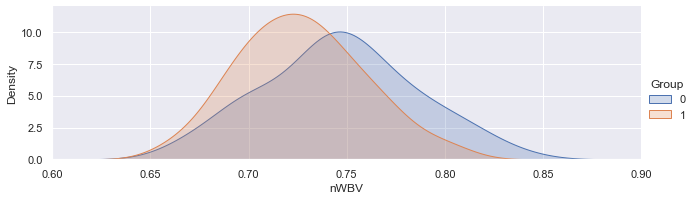

In [19]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',fill= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)


(50.0, 100.0)

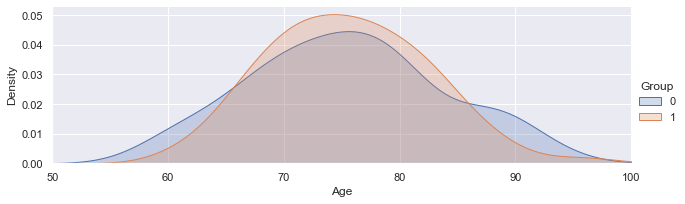

In [20]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)


(0.0, 0.16)

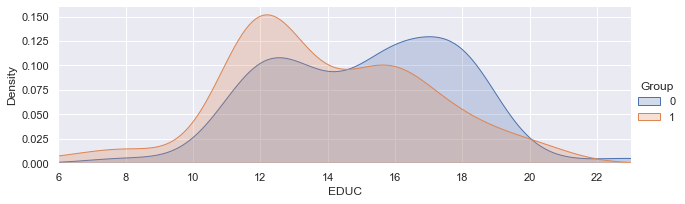

In [21]:
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',fill= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)


In [22]:
pd.isnull(df).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [23]:
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [24]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

In [25]:
x = df['EDUC']
y = df['SES']

In [26]:
ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]


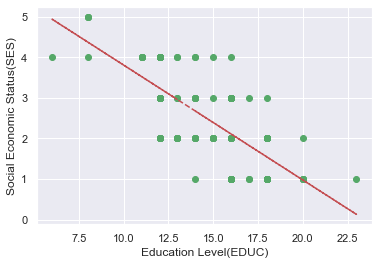

In [27]:
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Education Level(EDUC)')
plt.ylabel('Social Economic Status(SES)')

plt.show()


In [28]:
df.groupby(['EDUC'])['SES'].median()



EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

In [29]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [30]:
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score



In [32]:
Y = df['Group'].values
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] 


In [33]:
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, random_state=0)



In [34]:
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)




In [35]:
Y = df_dropna['Group'].values 
X = df_dropna[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

X_trainval_dna, X_test_dna, Y_trainval_dna, Y_test_dna = train_test_split(
    X, Y, random_state=0)

scaler = MinMaxScaler().fit(X_trainval_dna)
X_trainval_scaled_dna = scaler.transform(X_trainval_dna)
X_test_scaled_dna = scaler.transform(X_test_dna)



In [36]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc



In [37]:
acc = []

In [38]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, roc_curve, auc
from sklearn.svm import SVC


In [39]:
kfolds = 5 

In [40]:
best_score = 0


In [41]:

for c_parameter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for gamma_parameter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']:
            svmModel = SVC(kernel=k_parameter, C=c_parameter, gamma=gamma_parameter)
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            score = np.mean(scores)
            if score > best_score:
                best_score = score
                best_parameter_c = c_parameter
                best_parameter_gamma = gamma_parameter
                best_parameter_k = k_parameter

SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

In [42]:
test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)



In [43]:
print("Best parameter for C is:", best_parameter_c)
print("Best parameter for gamma is:", best_parameter_gamma)
print("Best parameter for the kernel is:", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameters is", test_auc)


Best parameter for C is: 100
Best parameter for gamma is: 0.1
Best parameter for the kernel is: rbf
Test accuracy with the best parameters is 0.8157894736842105
Test recall with the best parameters is 0.7
Test AUC with the best parameters is 0.8222222222222222


In [44]:
m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])
print(test_auc)


0.8222222222222222


In [45]:
!pip install xgboost


In [48]:
def warn(*args, **kwargs):
 pass
import warnings
warnings.warn = warn
import numpy as np 
import pandas as pd 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from scipy.stats import uniform, randint
import matplotlib.pylab as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
 for filename in filenames:
    print(os.path.join(dirname, filename))


In [52]:
data=pd.read_csv(r"C:\Users\student.MCC\Downloads\oasis_longitudinal.csv")

In [53]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [54]:
data.dropna(inplace=True)

In [55]:
data.tail()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323
372,OAS2_0186,OAS2_0186_MR3,Nondemented,3,1608,F,R,65,13,2.0,30.0,0.0,1333,0.801,1.317


In [56]:
orig_data = data.copy()
data = data[data["Group"]!= "Converted"]
data['Group'].replace(['Nondemented', 'Demented'],[0, 1], inplace=True)
data['M/F'].replace(['M', 'F'],[0, 1], inplace=True)

In [57]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  317 non-null    object 
 1   MRI ID      317 non-null    object 
 2   Group       317 non-null    int64  
 3   Visit       317 non-null    int64  
 4   MR Delay    317 non-null    int64  
 5   M/F         317 non-null    int64  
 6   Hand        317 non-null    object 
 7   Age         317 non-null    int64  
 8   EDUC        317 non-null    int64  
 9   SES         317 non-null    float64
 10  MMSE        317 non-null    float64
 11  CDR         317 non-null    float64
 12  eTIV        317 non-null    int64  
 13  nWBV        317 non-null    float64
 14  ASF         317 non-null    float64
dtypes: float64(5), int64(7), object(3)
memory usage: 39.6+ KB


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,0,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,0,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,0,1,0,1,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,0,2,538,1,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,0,1,0,0,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


In [58]:
data.loc[:,['Age','EDUC','SES','MMSE', 'eTIV','ASF']]


,Age,EDUC,SES,MMSE,eTIV,ASF
0,87,14,2.0,27.0,1987,0.883
1,88,14,2.0,30.0,2004,0.876
5,88,18,3.0,28.0,1215,1.444
6,90,18,3.0,27.0,1200,1.462
7,80,12,4.0,28.0,1689,1.039
...,...,...,...,...,...,...
368,82,16,1.0,28.0,1693,1.037
369,86,16,1.0,26.0,1688,1.040
370,61,13,2.0,30.0,1319,1.331
371,63,13,2.0,30.0,1327,1.323


In [59]:
def scale(df):
    dfs = df.copy()
    columns = ['Age','EDUC','SES','MMSE', 'eTIV','ASF']
    for feature in columns:
        max_val = dfs[feature].max()
        min_val = dfs[feature].min()
        scaled = (dfs[feature] - min_val)/(max_val - min_val)
        dfs[feature] = scaled
    return dfs    

In [60]:
scaled_data = scale(data)
scaled_data .head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,0,R,0.710526,0.470588,0.25,0.884615,0.0,0.981069,0.696,0.009845
1,OAS2_0001,OAS2_0001_MR2,0,2,457,0,R,0.736842,0.470588,0.25,1.000000,0.0,1.000000,0.681,0.000000
5,OAS2_0004,OAS2_0004_MR1,0,1,0,1,R,0.736842,0.705882,0.50,0.923077,0.0,0.121381,0.710,0.798875
6,OAS2_0004,OAS2_0004_MR2,0,2,538,1,R,0.789474,0.705882,0.50,0.884615,0.0,0.104677,0.718,0.824191
7,OAS2_0005,OAS2_0005_MR1,0,1,0,0,R,0.526316,0.352941,0.75,0.923077,0.0,0.649220,0.712,0.229255


In [61]:
y = scaled_data['Group']
x = scaled_data.drop('Group',axis=1)
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)
xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((253, 14), (64, 14), (253,), (64,))

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
data_path = r"C:\Users\student.MCC\Downloads\oasis_longitudinal.csv"
df = pd.read_csv(data_path)
categorical_columns = ['Subject ID', 'MRI ID', 'M/F', 'Hand']
df = pd.get_dummies(df, columns=categorical_columns)
label_encoder = LabelEncoder()
df['Group'] = label_encoder.fit_transform(df['Group']
X = df.drop(columns=['Group'])
y = df['Group']
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)
params = {
    "colsample_bytree": uniform(0.1, 0.3),
    "gamma": uniform(0.5, 1),
    "learning_rate": uniform(0.001, 0.005),
    "max_depth": randint(1,3),
    "n_estimators": randint(5, 10),
    "subsample": uniform(0.4, 0.3)
}
xgb_model = XGBClassifier(objective="multi:softmax", num_class=len(df['Group'].unique()),random_state=42,use_label_encoder=False,eval_metric='mlogloss')
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42,n_iter=50,cv=3,verbose=0,n_jobs=1,return_train_score=True,scoring='accuracy')
search.fit(xTrain, yTrain)
best_model = search.best_estimator_
yPredict = best_model.predict(xTest)
accuracy = accuracy_score(yTest, yPredict)
print('Test set accuracy: {:.3f}' .format(accuracy))
conf_matrix = confusion_matrix(yTest, yPredict)
print('Confusion Matrix:')
print(conf_matrix)
classification_report = classification_report(yTest, yPredict)
print('Classification Report:')
print(classification_report)

Test set accuracy: 0.747
Confusion Matrix:
[[ 0  1 10]
 [ 0 27  5]
 [ 0  3 29]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.87      0.84      0.86        32
           2       0.66      0.91      0.76        32

    accuracy                           0.75        75
   macro avg       0.51      0.58      0.54        75
weighted avg       0.65      0.75      0.69        75



In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [72]:
acc = [] 

In [91]:
best_score=0
kfolds=5 

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    scores = cross_val_score(logRegModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy') # Get recall for each parameter setting
    score = np.mean(scores)

    if score > best_score:
        best_score = score
        best_parameters = c
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled, Y_trainval)

test_score2 = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)
m = 'Logistic Regression (w/ imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.733596837944664
Best parameter for regularization (C) is:  10
Test accuracy with best C parameter is 0.8055555555555556
Test recall with the best C parameter is 0.7
Test AUC with the best C parameter is 0.7666666666666667


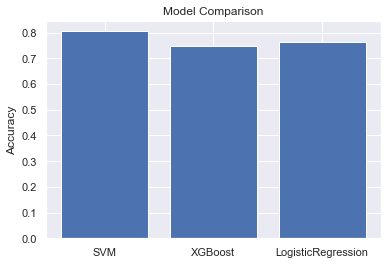

In [92]:
import matplotlib.pyplot as plt

models = ['SVM', 'XGBoost','LogisticRegression']  
accuracies = [test_score, accuracy,test_score2]  

plt.bar(models, accuracies)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


In [97]:
if(test_score>accuracy and test_score>test_score2):
    print("SVM is best among 3 algorithms with accuracy:",test_score)
elif(accuracy>test_score and accuracy>test_score2):
    print("XGB is best among 3  algorithms with accuracy:",acccuracy)
else:
    print("LogisticRegrssion is best among 3 algorithms with accuracy:",test_score2)

SVM is best among 3 algorithms with accuracy: 0.8055555555555556
